## BUSINESS UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from scipy.stats import chi2_contingency
import joblib


# visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# view data

data = pd.read_csv('Iris.csv')
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# set index to a specific column
data.set_index('Id', inplace=True)

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## DATA UNDERSTANDING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

+ Dataset has no null values

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Univariate Analysis__

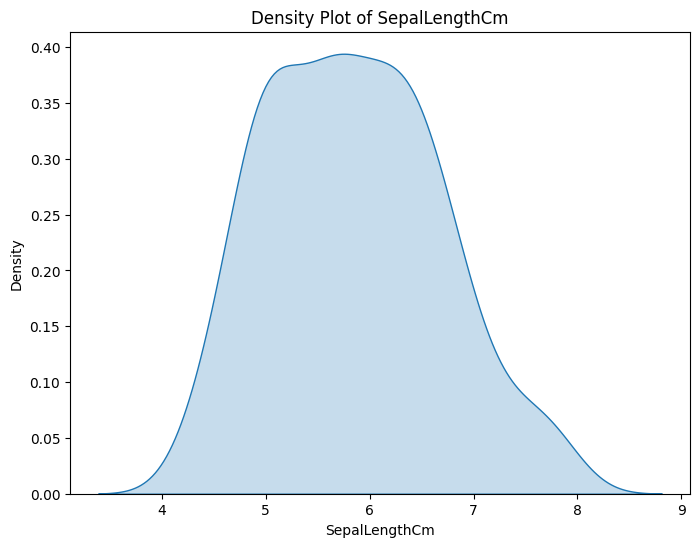

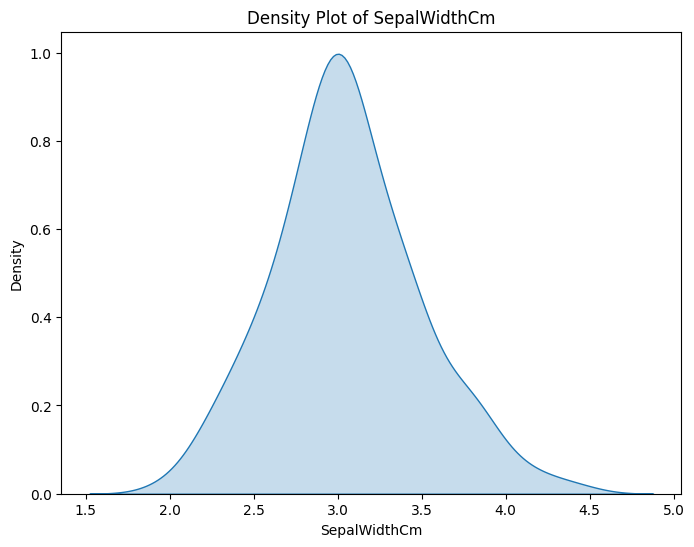

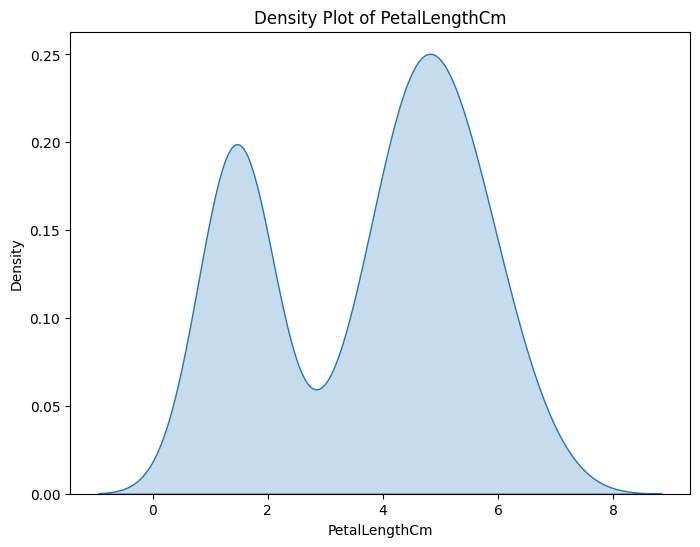

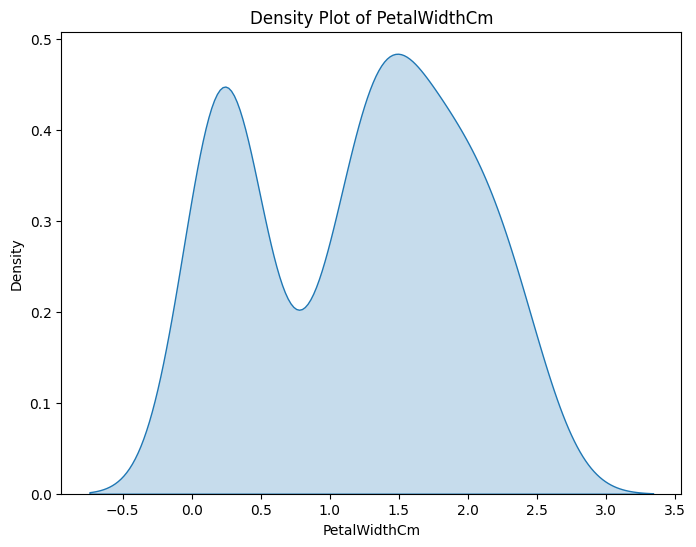

In [7]:

# Density Plots

for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=col, fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.show()

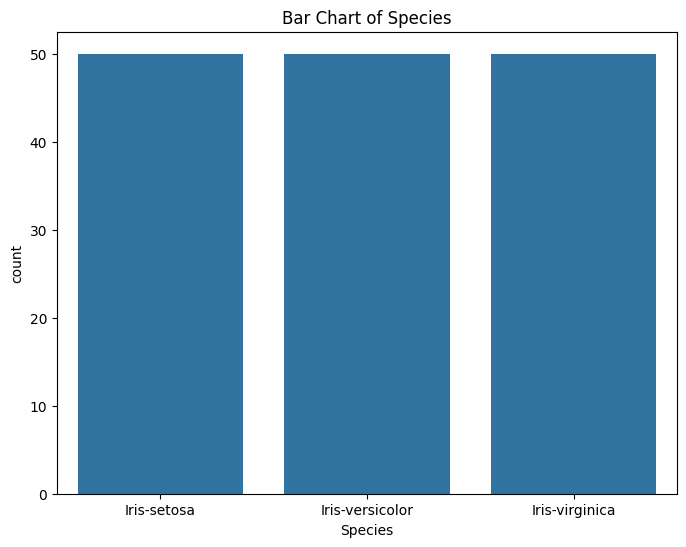

In [8]:
# Bar Charts (for categorical variables)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
#    plt.ylabel('Count')
    plt.show()

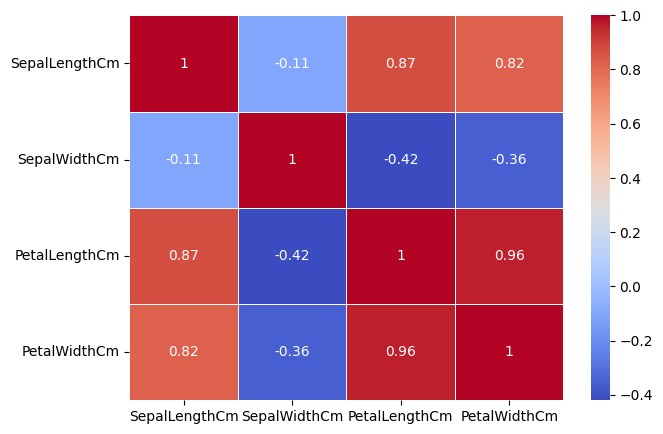

In [9]:
numeric_data = data.drop(columns=['Species'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

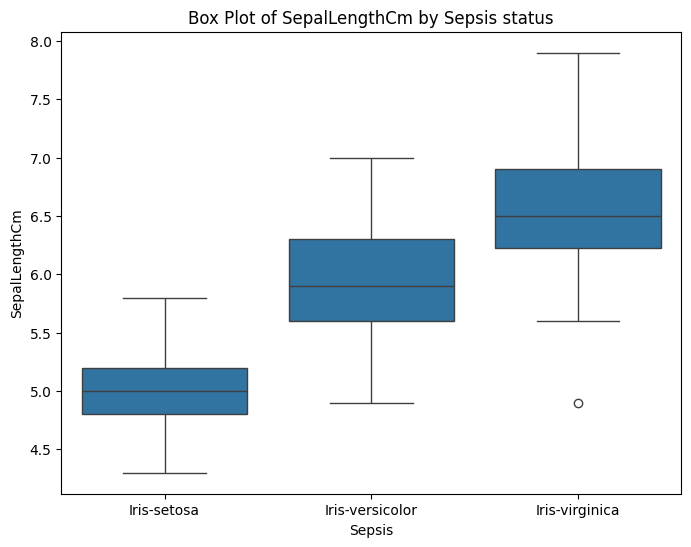

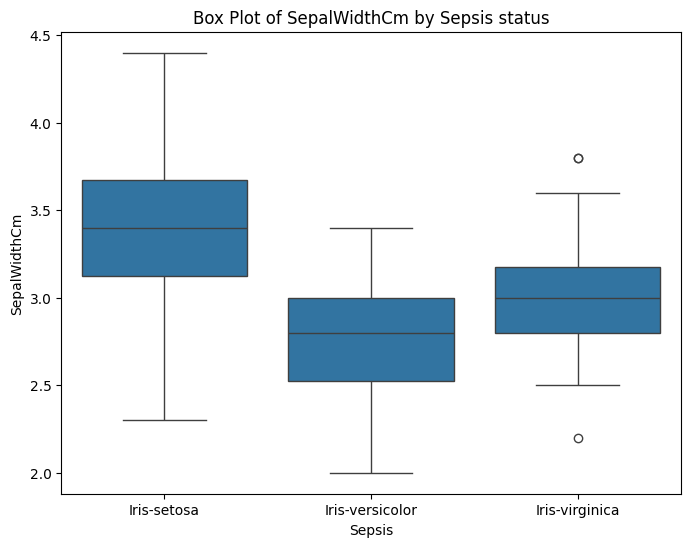

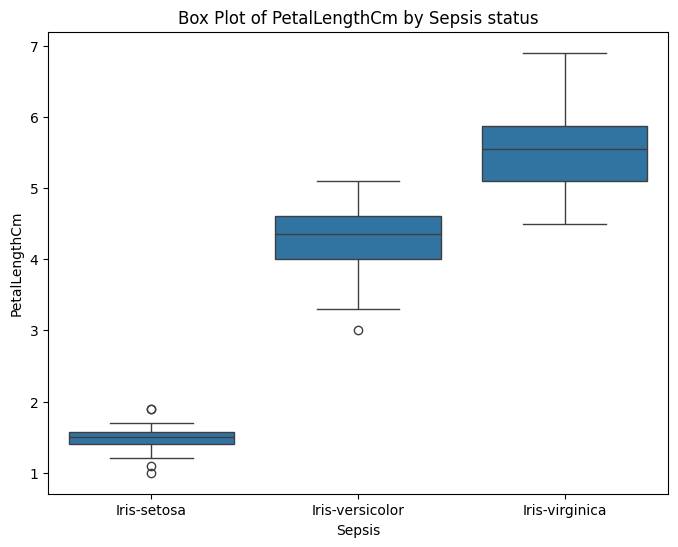

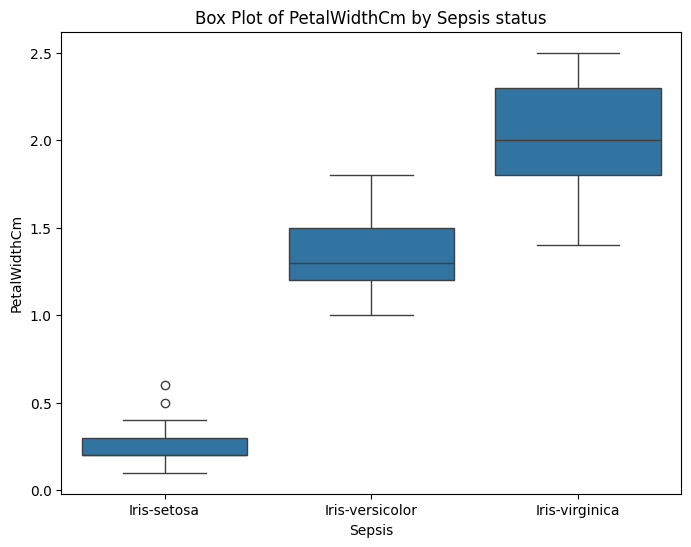

In [10]:
# Box Plots
for col in numeric_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Species'], y=data[col])
    plt.title(f'Box Plot of {col} by Sepsis status')
    plt.xlabel('Sepsis')
    plt.ylabel(col)
    plt.show()


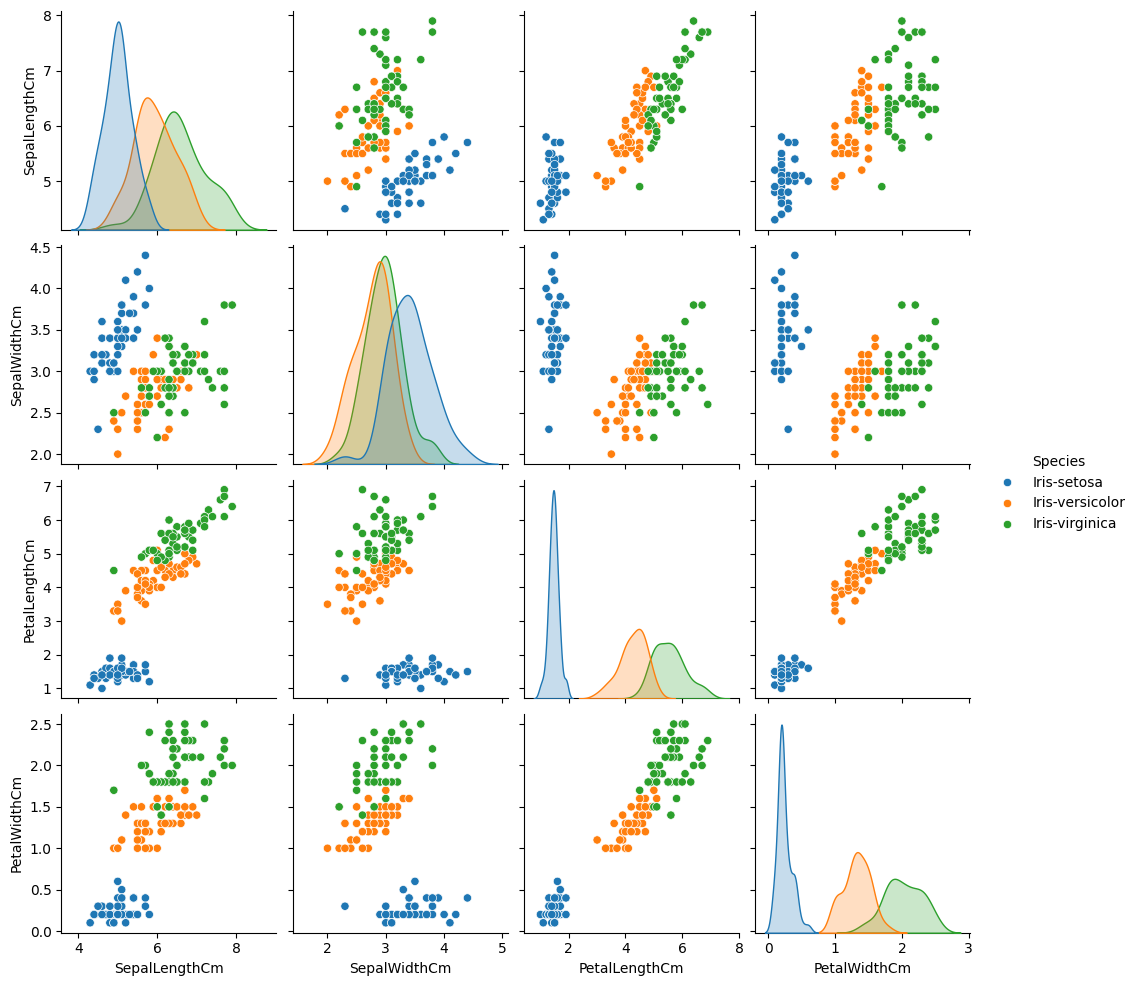

In [11]:
#  Species Identification and Differentiation
sns.pairplot(data, hue='Species')
plt.show()

## DATA PREPARATION

In [12]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [13]:
# view unique values
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
# extract species name
data['Species'] = data['Species'].apply(lambda x: x.split('-')[1])

In [15]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


## MODELING AND EVALUATION

Split data into features(X) and target variables(y)

In [16]:
# predictive variable
X = data.drop(columns=['Species'], axis=1)

# target variable
y = data['Species']


In [17]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



Split data into test and train

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [19]:
features = X.columns
features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

create preprocessor

In [20]:
# create a preprocessor to be applied to data
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'),features),
        ('scaler', StandardScaler(), features)
            ]
)

create a list of models to be trained

In [21]:
# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Tree-based (Decision Tree)', DecisionTreeClassifier(random_state=42))
]

In [22]:
# view nodels
for model_name, model in models:
    print(f'{model_name}')

Random Forest
Logistic Regression
Support Vector Machine
K-Nearest Neighbors
Tree-based (Decision Tree)


In [24]:
# create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name','Precision','Recall','Accuracy','F1_Score'])

# initialize dictionary to store pipelines
pipelines = {}


#loop and train models
for model_name, model in models:
    pipeline= Pipeline(steps=[
     ('preprocessor',preprocessor),
    ('feature importance',SelectKBest(mutual_info_classif,k='all')),
    ('classifier',model)
    ])

    #fit train data to pipeline
    pipeline.fit(X_train,y_train)

    # make prediction on the test set
    y_pred = pipeline.predict(X_test)
   
    # store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict= True)

    #save each pipeline in the loop in the dictionary
    pipelines[model_name]= pipeline

    # get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1]

#sort values by f1_score in descending
metrics_table.sort_values('F1_Score',ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
1,Logistic Regression,0.966667,0.969697,0.966667,0.966583
2,Support Vector Machine,0.966667,0.969697,0.966667,0.966583
4,Tree-based (Decision Tree),0.966667,0.969697,0.966667,0.966583
3,K-Nearest Neighbors,0.933333,0.944444,0.933333,0.932660
0,Random Forest,0.900000,0.902357,0.900000,0.899749


# Hyperparameter Tuning

In [29]:
# Define the parameter grids

models = [
    ('Random Forest', RandomForestClassifier(), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    ('Logistic Regression', LogisticRegression(max_iter=1000), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'lbfgs']
    }),
    ('Support Vector Machine', SVC(probability=True), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    }),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    })
]


In [31]:
# Create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Accuracy', 'F1_Score'])

# Initialize dictionary to store pipelines
pipelines = {}

# Loop and train models
for model_name, model, param_grid in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', model)
    ])

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best pipeline
    best_pipeline = grid_search.best_estimator_

    # Make prediction on the test set
    y_pred = best_pipeline.predict(X_test)
    y_pred_proba = best_pipeline.predict_proba(X_test)  # Get the probabilities

    # Store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict=True)

    # Save each pipeline in the loop in the dictionary
    pipelines[model_name] = best_pipeline

    # Get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # Add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name, precision, recall, accuracy, f1]

# Sort values by F1_Score in descending order
metrics_table = metrics_table.sort_values('F1_Score', ascending=False)

# Display the metrics table
print(metrics_table)


               Model Name  Precision    Recall  Accuracy  F1_Score
0           Random Forest   0.969697  0.966667  0.966667  0.966583
1     Logistic Regression   0.969697  0.966667  0.966667  0.966583
2  Support Vector Machine   0.969697  0.966667  0.966667  0.966583
3     K-Nearest Neighbors   0.969697  0.966667  0.966667  0.966583
4           Decision Tree   0.933333  0.933333  0.933333  0.933333
